In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

In [16]:
import warnings
warnings.filterwarnings('ignore')

from tqdm.notebook import trange, tqdm

In [30]:
macro_data = pd.read_csv("AP_train_data_2final.csv")
macro_data = macro_data.dropna(axis=1)
macro_data = macro_data.drop(['eq_capgain'],axis=1)
macro_data.loc[:,['Ycurve']] = pd.to_numeric(macro_data.Ycurve,errors='coerce')
macro_data.loc[:, ['DebtService']] = pd.to_numeric(macro_data.DebtService,errors='coerce')
lockdown = [1,1,1,1,1,1,1,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,0
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,2
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1
,1]
macro_data['lockdown'] = lockdown
macro_data

,rconpc,iy,cpi,ca,money,Ycurve,DebtService,debtgdp,crisisJST,tloans,lockdown
0,1.000000,1.000000,1.000000,1.000000,1.000000,0.467825,1.000000,1.000000,0,1.000000,1
1,1.000000,1.000000,1.000000,1.000000,1.000000,0.490000,1.000000,1.000000,0,1.000000,1
2,1.033573,0.864230,0.983999,1.087213,1.000972,0.713792,1.104776,1.015313,0,0.995179,1
3,1.030156,0.816253,0.976281,1.471913,1.028099,0.502433,1.011805,0.993790,0,0.965433,1
4,0.992806,0.976355,1.008163,3.020663,1.066136,0.212283,0.926737,0.991587,0,0.966189,1
...,...,...,...,...,...,...,...,...,...,...,...
1134,1.024667,1.029329,1.030249,0.506909,1.045541,1.070000,1.047439,1.013312,1,1.039567,1
1135,1.022384,1.018984,1.032970,0.357266,1.047812,-0.178330,1.067481,1.008190,1,1.023031,1
1136,1.022017,0.918509,1.092131,0.742623,1.282101,2.240830,0.951135,1.284872,0,0.991307,1
1137,1.021489,0.927043,1.083791,0.809628,1.287504,2.450833,0.941001,1.292247,0,0.988075,1


In [31]:
X = macro_data.drop(['crisisJST'],axis=1).values
Y = macro_data.loc[:,['crisisJST']].values
X_norm = pd.DataFrame(StandardScaler().fit_transform(X))
X_train,X_test, Y_train, Y_test = train_test_split(X_norm,Y[:,0],test_size=0.3,random_state=1)

In [32]:
# Test options and evaluation metric
seed = 7
scoring = 'f1'

inner_cv = model_selection.KFold(n_splits=5, random_state=seed)
outer_cv = model_selection.KFold(n_splits=5,random_state=seed)

#define models and parameters
models_and_parameters = {
    'SGDC': (SGDClassifier(),{'loss': ["log"],'max_iter':[100,500,1000], 'class_weight':["balanced"]}),
    'CART': (DecisionTreeClassifier(),{'max_depth': [3, 4, 5, 6],'min_samples_leaf': [0.04, 0.06, 0.08],'max_features': [0.2, 0.4,0.6, 0.8]}),
    'SVM': (SVC(),{'C':[0.03125,0.09921,1024], 'gamma':[0.0009766,0.0026578,8],'class_weight':["balanced"]}),
    'RF': (RandomForestClassifier(),{'n_estimators':[500,1000], 'max_features':[1,2,9,10],'max_depth':[2,3,4,5,7,10,12,15,20]}),
    'ET': (ExtraTreesClassifier(),{'n_estimators':[500,1000],'max_features':[1,2,9,10],'max_depth':[2,3,4,5,7,10,12,15,20]})
    }

average_scores_across_outer_folds_for_each_model = dict()


#evaluate each model

for name, (model,params) in tqdm(models_and_parameters.items()):
    clf = GridSearchCV(estimator=model,param_grid=params,cv=inner_cv,scoring=scoring)
    
    nested_score = model_selection.cross_val_score(clf,X_train,Y_train,cv=outer_cv,scoring=scoring)
    
    average_scores_across_outer_folds_for_each_model[name] = np.mean(nested_score)
    statistic_summary = 'Model: {name}\nF1 in the five outerfolds: {scores}\nAverage F1 score: {avg}'
    print(statistic_summary.format(name=name,scores=nested_score,avg=np.mean(nested_score)))
    

print('Average score across the outer folds: ',
          average_scores_across_outer_folds_for_each_model)    
    
#now find best estimator with optimal hyperparameters
best_model_name, best_model_avg_score = max(average_scores_across_outer_folds_for_each_model.items(), key=(lambda name_averagescore: name_averagescore[1]))

# get the best model and its associated parameter grid
best_model, best_model_params = models_and_parameters[best_model_name]

best_model, best_model_params = models_and_parameters[best_model_name]

final_regressor = GridSearchCV(best_model, best_model_params, cv=inner_cv)
final_regressor.fit(X_train, Y_train)

print('Best model: \n\t{}'.format(best_model), end='\n\n')
print('Estimation of its F1 score:\n\t{}'.format(best_model_avg_score), end='\n\n')
print('Best parameter choice for this model: \n\t{params}'
          '\n(according to cross-validation `{cv}` on the whole dataset).'.format(params=final_regressor.best_params_, cv=inner_cv))
    
        
    

Model: SGDC
F1 in the five outerfolds: [0.26190476 0.13207547 0.29268293 0.2        0.17647059]
Average F1 score: 0.2126267497334875
Model: CART
F1 in the five outerfolds: [0.         0.09090909 0.         0.         0.        ]
Average F1 score: 0.01818181818181818
Model: SVM
F1 in the five outerfolds: [0.27777778 0.20895522 0.325      0.20338983 0.23684211]
Average F1 score: 0.2503929874860014
Model: RF
F1 in the five outerfolds: [0.08695652 0.         0.21052632 0.15384615 0.11764706]
Average F1 score: 0.11379521003965747
Model: ET
F1 in the five outerfolds: [0.         0.14285714 0.10526316 0.28571429 0.11764706]
Average F1 score: 0.13029632905793895

Average score across the outer folds:  {'SGDC': 0.2126267497334875, 'CART': 0.01818181818181818, 'SVM': 0.2503929874860014, 'RF': 0.11379521003965747, 'ET': 0.13029632905793895}
Best model: 
	SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf',

NameError: name 'results' is not defined

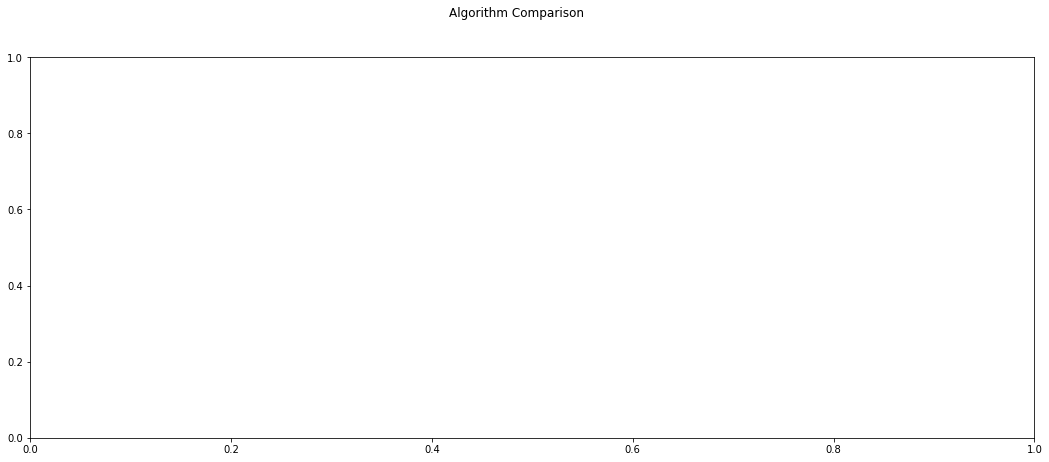

In [33]:
fig = plt.figure(figsize=(18,7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel("F1 Score")
plt.xlabel("Algorithm")
plt.show()

In [38]:
#try on decision tree classifier
CART = DecisionTreeClassifier()
CART.fit(X_train,Y_train)
y_pred = CART.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))
print("F1:",metrics.f1_score(Y_test,y_pred))

Accuracy: 0.8859649122807017
Precision: 0.32142857142857145
Recall: 0.3103448275862069
F1: 0.31578947368421056


In [39]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[294,  19],
       [ 20,   9]])

Text(0.5, 257.44, 'Predicted')

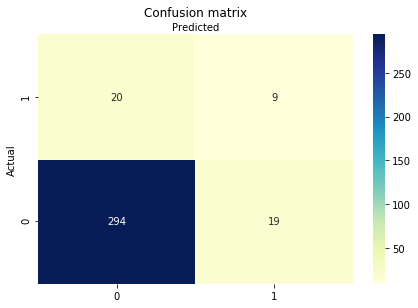

In [40]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.set_ylim([0,2])
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

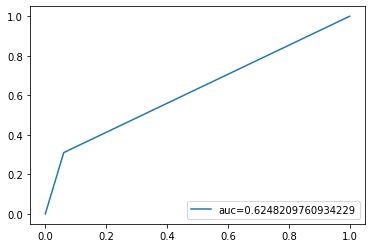

In [45]:
y_pred_proba = CART.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()